In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
##from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/deep learning/Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 8,
                                                 class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/deep learning/Dataset/val',
                                            target_size = (64, 64),
                                            batch_size = 8,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [ ]:
model.fit(training_set,
          steps_per_epoch=10,
          epochs=50,
          validation_data=val_set,
          validation_steps=2)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5336 - loss: 1.1841 - val_accuracy: 0.8125 - val_loss: 0.5844
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.7071 - loss: 0.6114 - val_accuracy: 0.7500 - val_loss: 0.4859
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.7219 - loss: 0.5094 - val_accuracy: 0.8750 - val_loss: 0.4004
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.8989 - loss: 0.4308 - val_accuracy: 0.9375 - val_loss: 0.2727
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.8899 - loss: 0.3365 - val_accuracy: 0.8750 - val_loss: 0.2695
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.9431 - loss: 0.2660 - val_accuracy: 0.9375 - val_loss: 0.2422
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.8761 - loss: 0.3543 - val_accuracy: 0.7500 - val_loss: 0.3423
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8895 - loss: 0.2828 - val_accuracy: 0.9

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,812,229 (45.06 MB)

 Trainable params: 3,937,409 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,874,820 (30.04 MB)

In [ ]:


# Fit the model
history = model.fit(
    training_set,
    epochs=10,
    validation_data=val_set,
    batch_size=128
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.9866 - loss: 0.0781 - val_accuracy: 1.0000 - val_loss: 0.0244
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.9744 - loss: 0.0666 - val_accuracy: 0.9500 - val_loss: 0.1513
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.8741 - loss: 0.2404 - val_accuracy: 0.9000 - val_loss: 0.3060
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.9246 - loss: 0.2737 - val_accuracy: 0.9500 - val_loss: 0.0669
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.9880 - loss: 0.0511 - val_accuracy: 0.9500 - val_loss: 0.0767
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 1.0000 - loss: 0.0245 - val_accuracy: 1.

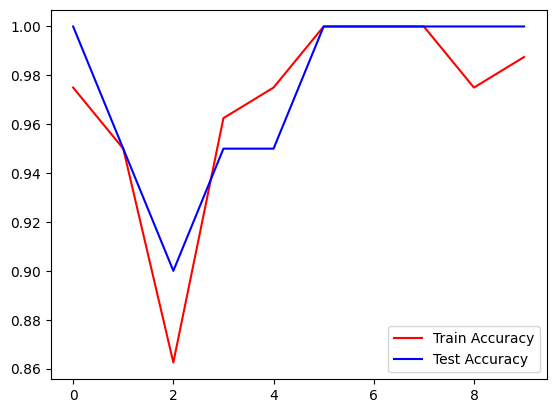

In [ ]:
# plot the accuracy plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

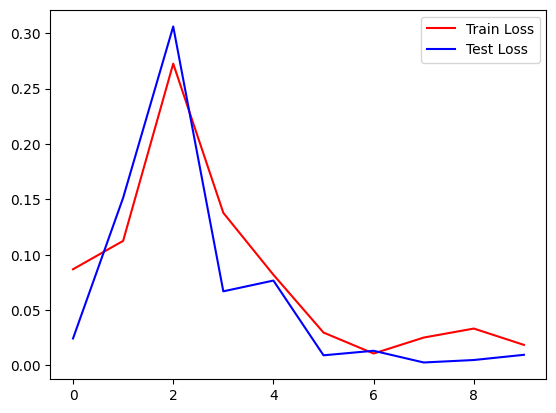

In [ ]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [ ]:

_, accuracy = model.evaluate(val_set, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


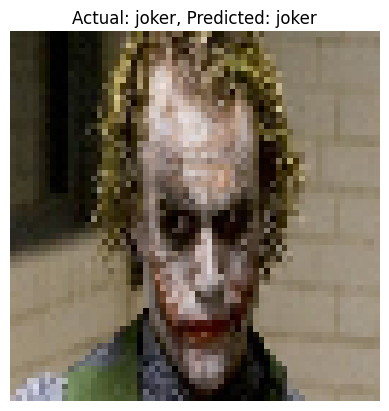

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


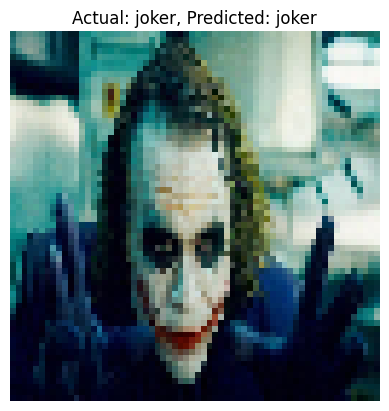

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


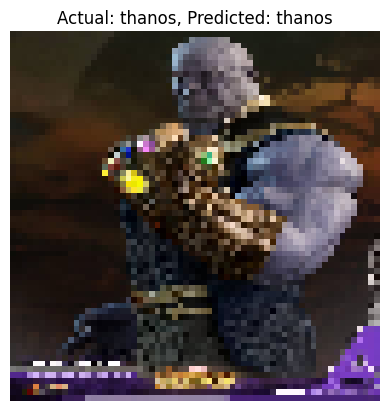

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


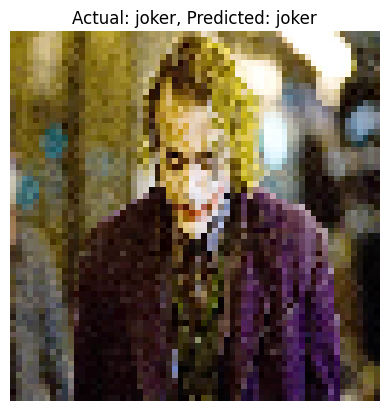

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


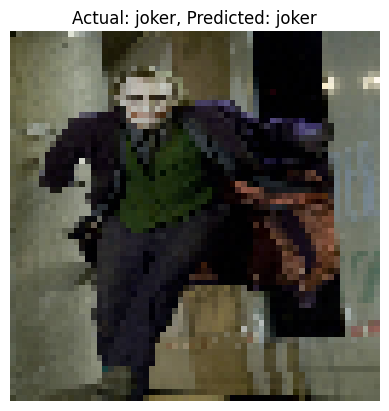

In [ ]:


import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_display_images(model, val_set, num_images=5):
    """Predicts classes for images and displays them with actual and predicted labels."""

    class_indices_reverse = {v: k for k, v in val_set.class_indices.items()}

    for i in range(num_images):
        # Get a batch of images and labels
        batch_images, batch_labels = next(val_set)
        img = batch_images[0]  # Take the first image from the batch
        actual_label = class_indices_reverse[int(batch_labels[0])]

        # Preprocess the image (if needed, adjust based on your model's input requirements)
        img = np.expand_dims(img, axis=0)

        # Make prediction
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction) if prediction.shape[1] > 1 else (1 if prediction[0][0] > 0.5 else 0)
        predicted_label = class_indices_reverse[predicted_class]

        # Display the image
        plt.imshow(batch_images[0])
        plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

# Example usage (assuming you have your model and val_set defined):
predict_and_display_images(model, val_set)


In [ ]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)  # Adjust the number of units as needed
x = Dense(4096, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 119,549,953 (456.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# mobile net
from tensorflow.keras.applications import MobileNet

# Load the MobileNet model with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling2D for better performance
x = Dense(1024, activation='relu')(x) # Add a dense layer
predictions = Dense(1, activation='sigmoid')(x) # Output layer with sigmoid activation for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,279,489 (16.32 MB)

 Trainable params: 1,050,625 (4.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


# TEST

In [ ]:
from keras.models import model_from_json
import numpy as np
from keras.preprocessing import image

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def classify(img_file):
    img_name = img_file
    test_image = image.load_img(img_name, target_size = (64, 64))

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    if result[0][0] == 1:
        prediction = 'Thanos'
    else:
        prediction = 'Joker'
    print(prediction,img_name)

In [ ]:


import os
path = '/content/drive/MyDrive/deep learning/Dataset,/content/drive/MyDrive/deep learning/Dataset/test,/content/drive/MyDrive/deep learning/Dataset/train,/content/drive/MyDrive/deep learning/Dataset/val'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
   for file in f:
     if '.jpeg' in file:
       files.append(os.path.join(r, file))

for f in files:
   classify(f)
   print('\n')